In [1]:
# ejemplo con Tensorflow
from __future__ import absolute_import, division, print_function

#  TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importo el dataset de ropa incluido
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
# forma de las imagenes
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

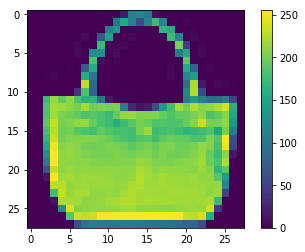

In [8]:
# solo muestra la forma de una imagen guardada
plt.figure()
plt.imshow(train_images[100]) #cambiar este parámetro cambia la img seleccionada
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Preprocesamiento, no se atoren mucho con esto
# We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:
train_images = train_images / 255.0

test_images = test_images / 255.0

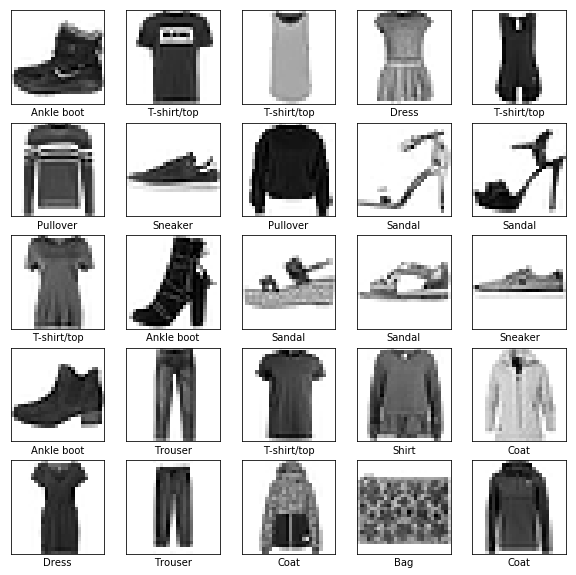

In [10]:
# muestra imagenes de entrenamiento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #primer layer solo toma los datos
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
#entrenamiento
# fit recibe el set de entrenamiento 
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5032 - accuracy: 0.8234
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3756 - accuracy: 0.8639
Epoch 3/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3372 - accuracy: 0.8776
Epoch 4/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.3127 - accuracy: 0.8845
Epoch 5/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2940 - accuracy: 0.8925


In [14]:
# verifica la precisión
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3456 - accuracy: 0.8754
Test accuracy: 0.8754


In [15]:
# With the model trained, we can use it to make predictions about some images.
predictions = model.predict(test_images)

In [16]:
#funcion para dibujar las predicciones
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

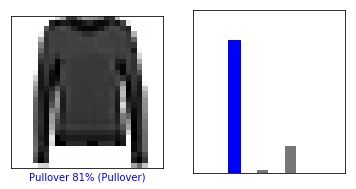

In [17]:
# resultado de la predicción
i = 99 #cambiar el numero cambia la imagen
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

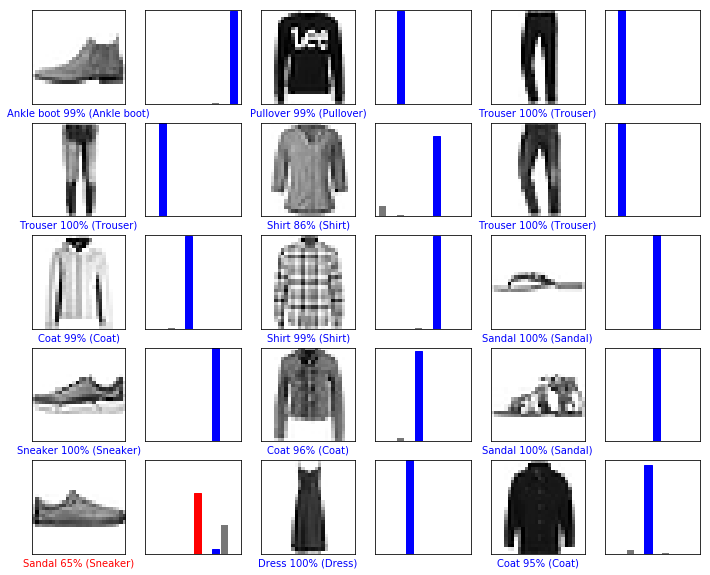

In [18]:
# plot the first X test images, their predicted label, and the true label
# color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [19]:
# grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [20]:
# add the image to a batch where it's the only member
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [21]:
predictions_single = model.predict(img)
print(predictions_single)

[[7.8895737e-06 2.5945829e-07 1.0487483e-07 1.9658724e-09 4.9801793e-06
  1.1786089e-03 3.2996807e-06 9.6734529e-03 7.4452764e-06 9.8912394e-01]]


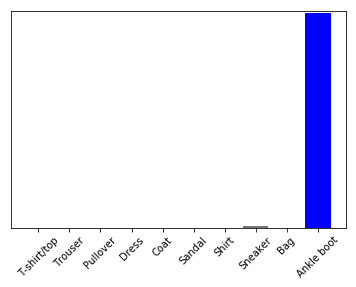

In [22]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [23]:
np.argmax(predictions_single[0])

9